<a href="https://colab.research.google.com/github/gosandayo/github.io/blob/main/Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5.9

In [4]:
#iris datasetsを利用
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

iris = load_iris(as_frame = True)
X = iris.data.iloc[:,[2,3]].values
y = iris.target
#SetosaとVersicolorはLinearly Separable
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

lin_svm = make_pipeline(
    StandardScaler(),
    LinearSVC(C = 1, random_state = 42)
)

lin_svm.fit(X_train, y_train)

SVC_svm = make_pipeline(
    StandardScaler(),
    SVC(kernel = "linear", C = 1, random_state = 42)
)

SVC_svm.fit(X_train, y_train)

SGD_svm = make_pipeline(
    StandardScaler(),
    SGDClassifier(loss = "hinge", penalty = "l2",  alpha = 0.1, random_state = 42)
)

SGD_svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(alpha=0.1, random_state=42))])

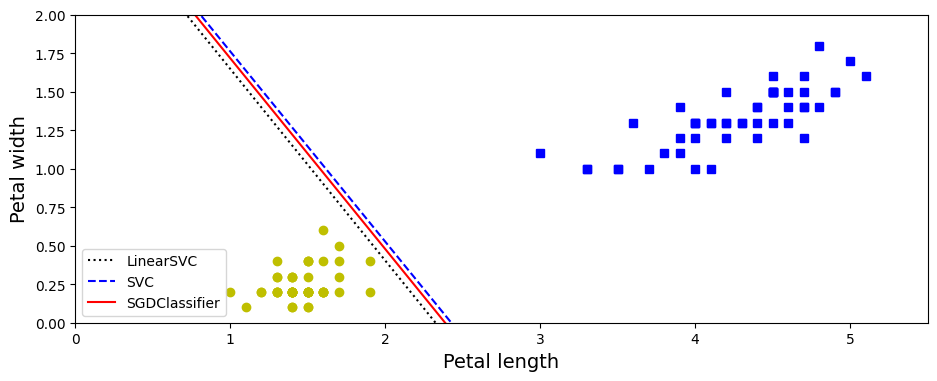

In [5]:
#Visualizing the three different models
import matplotlib.pyplot as plt
import numpy as np

svm_model = lin_svm.named_steps["linearsvc"]
SVC_model = SVC_svm.named_steps["svc"]
SGD_model = SGD_svm.named_steps["sgdclassifier"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def decision_boundary(model):
  # y  = ax + b
  a = -model.coef_[0,0] / model.coef_[0,1]
  b = -model.intercept_[0] / model.coef_[0,1]
  return scaler.inverse_transform([[-10, -10 * a + b], [10, 10 * a + b]]) #直線の両端の座標を返す

line_linsvm = decision_boundary(svm_model)
line_SVCsvm = decision_boundary(SVC_model)
line_SGDsvm = decision_boundary(SGD_model)

plt.figure(figsize = (11,4))
plt.plot(line_linsvm[0], line_linsvm[1], "k:", label = "LinearSVC")
plt.plot(line_SVCsvm[0], line_SVCsvm[1], "b--", label = "SVC")
plt.plot(line_SGDsvm[0], line_SGDsvm[1], "r-", label = "SGDClassifier")
plt.plot(X[:,0][y == 1], X[:,1][y == 1], "bs") #Iris Versicolorのプロット
plt.plot(X[:,0][y == 0], X[:,1][y == 0], "yo") #Iris Setosaのプロット
plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize = 14)
plt.axis([0, 5.5, 0, 2])
plt.legend()
plt.show()

## 5.10

### LinearSVCを使ってみる

In [6]:
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score

wine = load_wine(as_frame = True)
X = wine.data
y = wine.target


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
model1 = LinearSVC(max_iter = 100000, dual=True, random_state = 42)
model1.fit(X_train, y_train)
cross_val_score(model1, X_train, y_train).mean()


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

0.9475783475783477

max_iterationを増やしてみたが，収束しなかった．

### SVCを使ってみる

In [61]:
X= wine.data
y= wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model2 = SVC(random_state = 42)
model2.fit(X_train, y_train)

cross_val_score(model2, X_train, y_train).mean()

0.9698005698005698

### ハイパーパラメータのチューニング

In [57]:
#hyper-parameter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model2 = SVC(random_state = 42)
model2.fit(X_train, y_train)

param_distrib = {
    "gamma": loguniform(0.001, 0.1),
    "C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(model2, param_distrib, n_iter=100, cv=5,
                                   random_state=42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_

SVC(C=9.925589984899778, gamma=0.011986281799901188, random_state=42)

In [33]:
#hyper-parameter tuning by pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

model2 = make_pipeline(
    StandardScaler(),
    SVC(random_state = 42)
    )

param_distrib = {
    "svc__gamma": loguniform(0.001, 0.1),
    "svc__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(model2, param_distrib, n_iter=100, cv=5,
                                   random_state=42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=9.925589984899778, gamma=0.011986281799901188,
                     random_state=42))])

In [34]:
rnd_search_cv.best_score_

0.9925925925925926

In [35]:
rnd_search_cv.score(X_test, y_test)

0.9777777777777777

## 5.11

In [116]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame = True)
X = housing.data
y = housing.target
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [117]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [118]:
from sklearn.svm import LinearSVR

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
model = make_pipeline(
    StandardScaler(),
    LinearSVR(dual = True, random_state = 42, max_iter = 1000000)
)

model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, max_iter=1000000, random_state=42))])

In [107]:
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse


0.7570921837614031

### ハイパーパラメータを調整してみる

In [127]:
param_distrib_svr = {
    "linearsvr__epsilon": uniform(0.1, 0.5)
}

rnd_search_cv = RandomizedSearchCV(model, param_distrib_svr, n_iter = 100, cv = 5, random_state = 42)
rnd_search_cv.fit(X_train[:2000], y_train[:2000])
best_epsilon = rnd_search_cv.best_estimator_.named_steps["linearsvr"].get_params()["epsilon"]
best_epsilon

0.5697494707820946

In [129]:
rnd_search_cv.best_score_

0.6466484961505028

In [131]:
model1_rev = make_pipeline(
    StandardScaler(),
    LinearSVR(dual = True, random_state = 42, max_iter = 100000, epsilon = best_epsilon)
)

model1_rev.fit(X_train,y_train)
y_pred = model1_rev.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

0.7363092554919465

### SVRでやってみる

In [134]:
from sklearn.svm import SVR

model2 = make_pipeline(
    StandardScaler(),
    SVR(kernel = "rbf")
)

model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

0.5924581476846953

In [136]:
params_distrib_svr = {
    "svr__gamma": loguniform(0.001, 0.1),
    "svr__C" : uniform(1,10)
}

rnd_search_cv = RandomizedSearchCV(model2, params_distrib_svr, n_iter = 100, cv = 5, random_state = 42)
rnd_search_cv.fit(X_train[:2000], y_train[:2000])
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=4.63629602379294, gamma=0.08781408196485979))])

In [137]:
rnd_search_cv.best_score_

0.74479175111295

In [142]:
best_gamma = rnd_search_cv.best_estimator_.named_steps["svr"].get_params()["gamma"]
best_C = rnd_search_cv.best_estimator_.named_steps["svr"].get_params()["C"]

In [143]:
model2_rev = make_pipeline(
    StandardScaler(),
    SVR(kernel = "rbf", gamma = best_gamma, C = best_C)
)

model2_rev.fit(X_train, y_train)
y_pred = model2_rev.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

0.5841020143979829